In [1]:
import pickle
from HopDec import Model
from HopDec import Transitions
import pandas as pd

from HopDec.Input import getParams
from HopDec.Vectors import *
import networkx as nx
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
with open('model-checkpoint_latest.pkl', 'rb') as f:
    model = pickle.load(f)

In [31]:
for trans in model.transitionList:
    print(trans.redecoration)
    print(trans.forwardBarrier)

None
0.6855
None
0.6855
None
0.6855
None
0.6855
None
0.6855
None
0.6855
None
0.6855
None
0.6855
None
0.6855
None
0.6855
None
0.6855


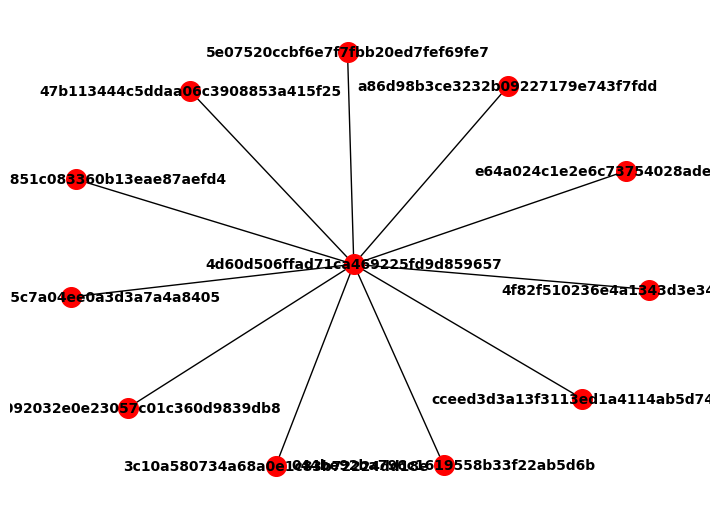

In [32]:
canonicalLabelsTrans = [ [ trans.initialState.nonCanLabel, trans.finalState.nonCanLabel  ] for trans in model.transitionList ]

G = nx.Graph()

G.add_edges_from(canonicalLabelsTrans)

pos = nx.spring_layout(G, seed=42)
# pos = nx.circular_layout(G)
# pos = nx.kamada_kawai_layout(G)

plt.figure(figsize=(7,5
                    ))

nx.draw(G, pos,with_labels=True, node_color='red', node_size=200, font_size=10, font_weight='bold',width = 1)


In [33]:
rows = []
for t,trans in enumerate(model.transitionList):
    rows.append({'trans ID' : t, 'I Can Label' : trans.initialState.nonCanLabel, 'F Can Label' : trans.finalState.nonCanLabel, 'F Bar' : trans.forwardBarrier,'dE' : trans.dE})

    
df = pd.DataFrame(rows)
df.sort_values(by=['dE','F Bar'])
    

,trans ID,I Can Label,F Can Label,F Bar,dE
0,0,4d60d506ffad71ca469225fd9d859657,e64a024c1e2e6c73754028ade62aa85c,0.6855,-0.0
1,1,4d60d506ffad71ca469225fd9d859657,0e6092032e0e23057c01c360d9839db8,0.6855,0.0
2,2,4d60d506ffad71ca469225fd9d859657,786c0d5b7851c083360b13eae87aefd4,0.6855,0.0
3,3,4d60d506ffad71ca469225fd9d859657,a86d98b3ce3232b09227179e743f7fdd,0.6855,-0.0
4,4,4d60d506ffad71ca469225fd9d859657,5e07520ccbf6e7f7fbb20ed7fef69fe7,0.6855,-0.0
5,5,4d60d506ffad71ca469225fd9d859657,4f82f510236e4a1343d3e34e18a02f31,0.6855,0.0
6,6,4d60d506ffad71ca469225fd9d859657,3c10a580734a68a0e1c83b72224dd18e,0.6855,0.0
7,7,4d60d506ffad71ca469225fd9d859657,47b113444c5ddaa06c3908853a415f25,0.6855,-0.0
8,8,4d60d506ffad71ca469225fd9d859657,cceed3d3a13f3113ed1a4114ab5d74a0,0.6855,0.0
9,9,4d60d506ffad71ca469225fd9d859657,044be92ba796c1619558b33f22ab5d6b,0.6855,-0.0


In [15]:
for t,trans in enumerate(model.transitionList):
    trans.exportStructure('trans',f'{t}')

[19/05/24, 16:55:51]: Transitions >> Saving NEB Structure to 'trans/0'
[19/05/24, 16:55:51]: Transitions >> Saving NEB Structure to 'trans/1'
[19/05/24, 16:55:51]: Transitions >> Saving NEB Structure to 'trans/2'
[19/05/24, 16:55:51]: Transitions >> Saving NEB Structure to 'trans/3'
[19/05/24, 16:55:51]: Transitions >> Saving NEB Structure to 'trans/4'
[19/05/24, 16:55:51]: Transitions >> Saving NEB Structure to 'trans/5'
[19/05/24, 16:55:51]: Transitions >> Saving NEB Structure to 'trans/6'
[19/05/24, 16:55:51]: Transitions >> Saving NEB Structure to 'trans/7'
[19/05/24, 16:55:51]: Transitions >> Saving NEB Structure to 'trans/8'
[19/05/24, 16:55:51]: Transitions >> Saving NEB Structure to 'trans/9'


In [18]:
model.stateList[0].time

390000

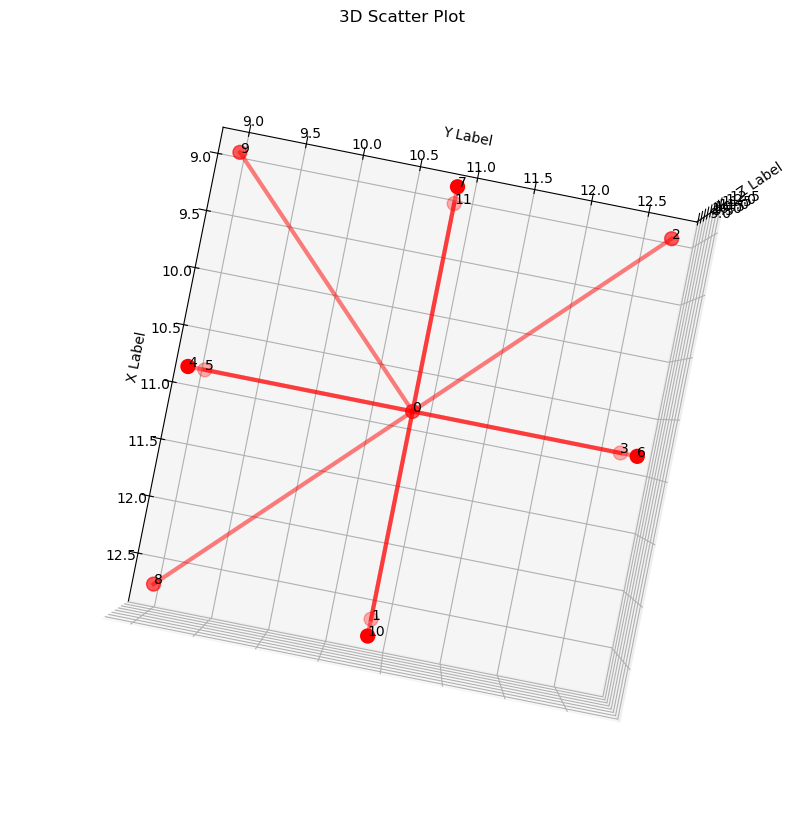

11

In [34]:
initialState = model.initState

x=[initialState.defectCOM[0]]
y=[initialState.defectCOM[1]]
z=[initialState.defectCOM[2]]

for trans in model.transitionList:
    x.append(trans.finalState.defectCOM[0])
    y.append(trans.finalState.defectCOM[1])
    z.append(trans.finalState.defectCOM[2])



# Create a larger figure
fig = plt.figure(figsize=(10, 8))  # Set the size to 10x8 inches
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color = 'red', s = 100)

for i, txt in enumerate(x):
    ax.text(x[i], y[i], z[i], '%s' % (i), color='black')
counttt=0    
for trans in model.transitionList:
    if maxMoveAtom(trans.initialState, model.initState) < 0.1:
        counttt+=1
        x = [ trans.initialState.defectCOM[0], trans.finalState.defectCOM[0] ]
        y = [ trans.initialState.defectCOM[1], trans.finalState.defectCOM[1] ]
        z = [ trans.initialState.defectCOM[2], trans.finalState.defectCOM[2] ]

        ax.plot(x,y,z, color = 'red', linewidth = 3, alpha = 0.5)
    
    

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

ax.view_init(elev=90, azim=10)

# Display the plot inline
plt.show()
counttt